# 库测试

In [1]:
import cv2

In [2]:
cv2.__version__

'3.3.1'

#  8.1 加载图像

In [180]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt 

image = cv2.imread("/Users/jiajia/Desktop/handing_img/12.png") # 读取文件 返回的也就是一个矩阵


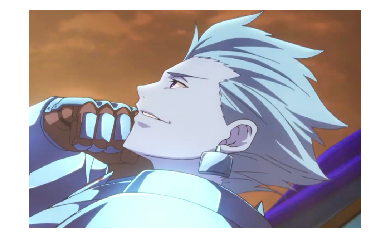

In [181]:
plt.imshow(image),plt.axis("off") # 用plt画图。  （这不就是密集打点吗？？
plt.show()


In [12]:
type(image)

numpy.ndarray

In [14]:
image.shape # 是三维矩阵 装的是三颜色

(609, 928, 3)

In [45]:
image_0 = image[:,:,0] # 取第一层
image_1 = image[:,:,1] # 取第二层
image_2 = image[:,:,2] # 取第三层

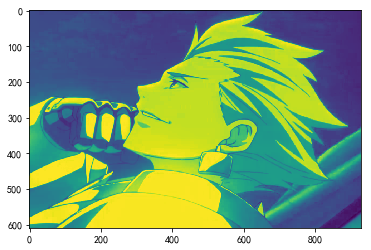

In [46]:
plt.imshow(image_0)
plt.imshow(image_1)
plt.imshow(image_2)

<function matplotlib.pyplot.show>

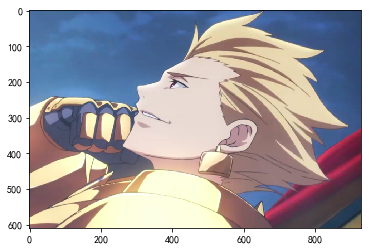

In [182]:
image_bgr = cv2.imread("/Users/jiajia/Desktop/handing_img/12.png",cv2.IMREAD_COLOR) # 读取文件 返回的也就是一个矩阵
image_rgb = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show

# 8.2 保存图片

True

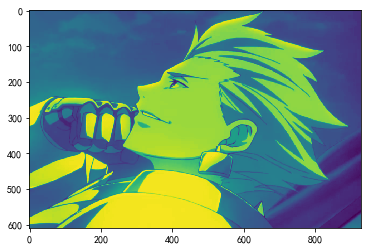

In [52]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt 

imagex = cv2.imread("/Users/jiajia/Desktop/handing_img/image1.png",cv2.IMREAD_GRAYSCALE)

plt.imshow(imagex)
plt.show
cv2.imwrite('/Users/jiajia/Desktop/handing_img/image2.png',imagex)

# 8.3  控制图片大小

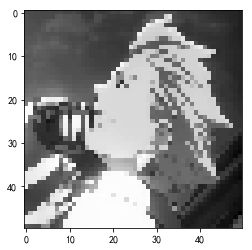

In [54]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt

image = cv2.imread("/Users/jiajia/Desktop/handing_img/image1.png",cv2.IMREAD_GRAYSCALE)
image_50x50 = cv2.resize(image,(50,50))

plt.imshow(image_50x50,cmap="gray") # 像素点少了 自然图就糊了

# 8.4 裁切图片


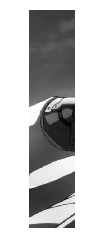

In [55]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

image = cv2.imread("/Users/jiajia/Desktop/handing_img/image1.png",cv2.IMREAD_GRAYSCALE)
image_cropped = image[:,:128]

plt.imshow(image_cropped,cmap="gray"),plt.axis("off")
plt.show()

# 8.5  模糊图片

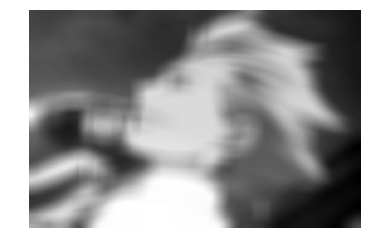

In [61]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

image = cv2.imread("/Users/jiajia/Desktop/handing_img/image1.png",cv2.IMREAD_GRAYSCALE)
image_blurry = cv2.blur(image,(50,50)) # 设置模糊程度

# plt.imshow(image_blurry,camp="gray"),plt.axis("off")
# plt.show()
plt.imshow(image_blurry,cmap="gray"),plt.axis("off")
plt.show()


In [77]:
# 设置卷积和
kernel = np.ones((5,5))*0.1
kernel

array([[0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1]])

In [78]:
image = cv2.imread("/Users/jiajia/Desktop/handing_img/image1.png",cv2.IMREAD_GRAYSCALE)

image_kernel = cv2.filter2D(image,-1,kernel)

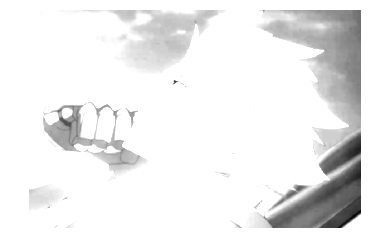

In [79]:
plt.imshow(image_kernel,cmap="gray"),plt.axis("off")
plt.show()

# 8.6 锐化图像（凸显边缘线 sharpening

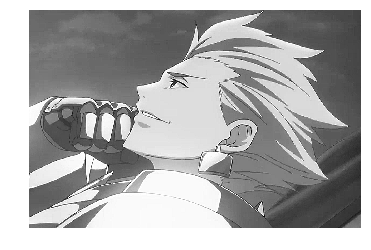

In [82]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt 
image = cv2.imread("/Users/jiajia/Desktop/handing_img/image1.png",cv2.IMREAD_GRAYSCALE)
kernel  = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
image_sharp = cv2.filter2D(image,-1,kernel)

plt.imshow(image_sharp,cmap="gray"),plt.axis("off")
plt.show()


#  8.7 图像增强

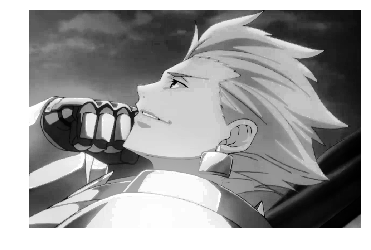

In [183]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

image = cv2.imread("/Users/jiajia/Desktop/handing_img/12.png",cv2.IMREAD_GRAYSCALE)
image_enhanced  = cv2.equalizeHist(image)

plt.imshow(image_enhanced, cmap="gray"),plt.axis("off")
plt.show()

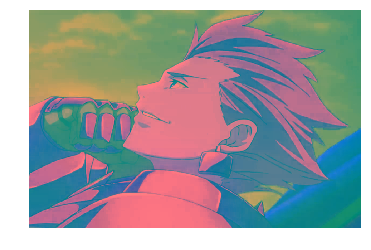

In [184]:
# 说明：如果是灰度图像，就这么着。要是彩图，图像会首先转化成YUV格式，Y是亮度，UV是颜色，增强之后再转回BGR或者RGB

image_bgr = cv2.imread("/Users/jiajia/Desktop/handing_img/12.png")
image_yuv = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2YUV)
image_yuv[:,:,0] = cv2.equalizeHist(image_bgr[:,:,0])

plt.imshow(image_yuv),plt.axis("off")
plt.show() # 这个就是yuv图像 颜色怪应该是因为色道窜了


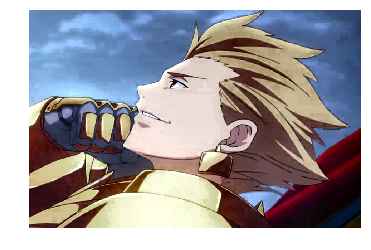

In [185]:
image_rgb = cv2.cvtColor(image_yuv,cv2.COLOR_YUV2RGB)
plt.imshow(image_rgb),plt.axis("off")
plt.show() 

In [ ]:
# 讨论部分 做过增强的图像如果能让目标和北京更容易分离，那就是有意义的。

# 8.8 分离颜色

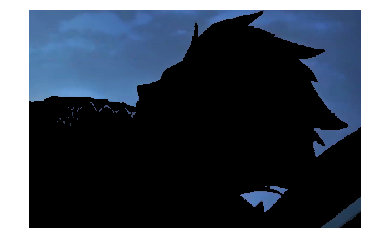

In [101]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

image_bgr = cv2.imread("/Users/jiajia/Desktop/handing_img/image1.png")
image_hsv = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2HSV)

lower_blue = np.array([50,100,50])
upper_blue = np.array([130,255,255])

mask = cv2.inRange(image_hsv,lower_blue,upper_blue)
image_bgr_masked = cv2.bitwise_and(image_bgr,image_bgr,mask=mask)
image_rgb = cv2.cvtColor(image_bgr_masked,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb),plt.axis('off')
plt.show()

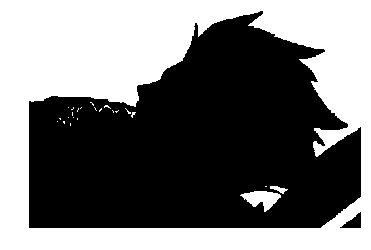

In [105]:
plt.imshow(mask, cmap='gray'),plt.axis("off") # 显示黑白 不带gray 参数的话 会有颜色
plt.show()

# 总的来说就是要的颜色是白，不要的颜色是黑，做成MASK，然后再把原色填充到图片

#  8.9 把图片0-1化 

In [ ]:
# threshold 阈

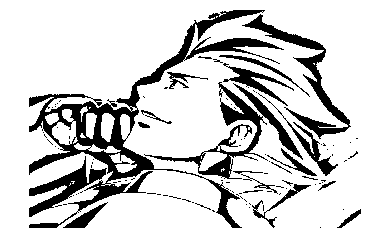

In [145]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

image_grey = cv2.imread("/Users/jiajia/Desktop/handing_img/12.png",cv2.IMREAD_GRAYSCALE)
max_output_value = 255
neighborhood_size  = 99
subtract_from_mean = 10 
image_binarized = cv2.adaptiveThreshold(image_grey,max_output_value,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY,
                                       neighborhood_size,
                                       subtract_from_mean)

plt.imshow(image_binarized,cmap="gray"),plt.axis("off")
plt.show()

 #用于降噪，突出主要人物。金闪闪好帅awsl

# 8.10 去除背景

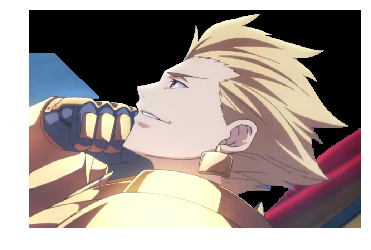

In [126]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

image_bgr = cv2.imread("/Users/jiajia/Desktop/handing_img/image1.png") # 图片读取进来默认是bgr模式
image_rgb = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)
rectangle = (0,10,1256,1256) # 控制抠取范围
mask  = np.zeros(image_rgb.shape[:2],np.uint8)


bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

cv2.grabCut(image_rgb,
           mask,
           rectangle,
           bgdModel,
           fgdModel,
           5,
           cv2.GC_INIT_WITH_RECT)

mask_2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
image_rgb_nobg = image_rgb*mask_2[:,:,np.newaxis]

plt.imshow(image_rgb_nobg),plt.axis("off")
plt.show()


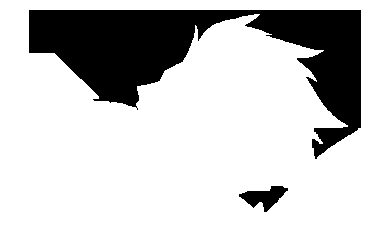

In [127]:
plt.imshow(mask_2,cmap='gray'),plt.axis("off")
plt.show()

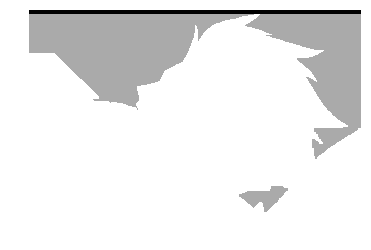

In [128]:
plt.imshow(mask,cmap='gray'),plt.axis("off")
plt.show()

#  8.11 图像取边缘

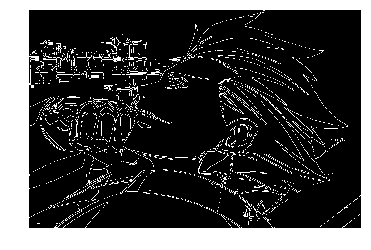

In [132]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

image_gray = cv2.imread("/Users/jiajia/Desktop/handing_img/image1.png",cv2.IMREAD_GRAYSCALE)
median_intensity  = np.median(image_gray)

lower_threshold = int(max(0,(1-0.33)*median_intensity))
upper_threshold = int(min(0,(1+0.33)*median_intensity))

image_canny = cv2.Canny(image_gray,lower_threshold,upper_threshold)


plt.imshow(image_canny,cmap='gray'),plt.axis("off")
plt.show()



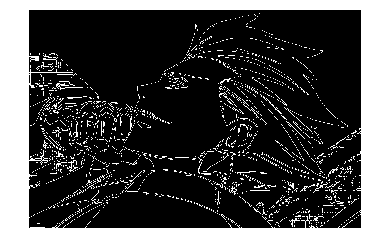

In [133]:
# 抠背景之后取边缘
image_cannyx = cv2.Canny(image_rgb_nobg,lower_threshold,upper_threshold)


plt.imshow(image_cannyx,cmap='gray'),plt.axis("off")
plt.show()


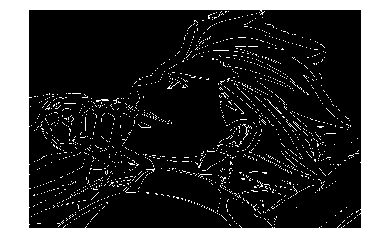

In [146]:
# 0-1化之后 取边缘
image_cannyx1 = cv2.Canny(image_binarized,lower_threshold,upper_threshold)


plt.imshow(image_cannyx1,cmap='gray'),plt.axis("off")
plt.show()


# 8.11 找图里边的折角 

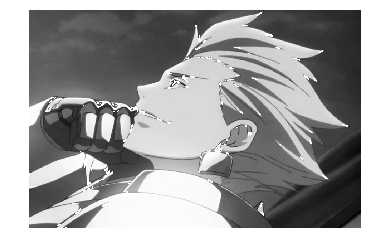

In [152]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

image_bgr = cv2.imread("/Users/jiajia/Desktop/handing_img/12.png")
image_gray = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

block_size =2 
aperture =29 
free_parameter = 0.04 

detector_responses = cv2.cornerHarris(image_gray,block_size,aperture,free_parameter)
detector_responses = cv2.dilate(detector_responses,None)

threshold =0.02 
image_bgr[detector_responses > threshold * detector_responses.max()] = [255,255,255]

image_gray = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray,cmap='gray'),plt.axis("off")
plt.show()



## 折角的本质是两条线相交的地方

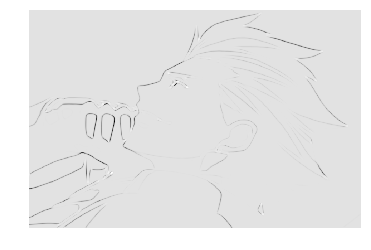

In [153]:
plt.imshow(detector_responses,cmap='gray'),plt.axis("off")
plt.show()

<function matplotlib.pyplot.show>

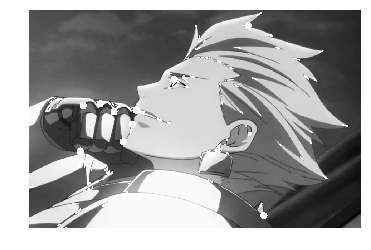

In [159]:
# 同样的找角原理 不同的算法 用的是上边的image_bgr

corners_to_detect  = 10 
mininum_quality_score = 0.05 
minimum_distance = 25

corners = cv2.goodFeaturesToTrack(image_gray,
                                  corners_to_detect,
                                  mininum_quality_score,
                                  minimum_distance)
corners  = np.float32(corners)

for corner in corners : 
    x,y = corner[0]
    cv2.circle(image_bgr,(x,y),10,(255,255,255),-1)
    
image_rgb = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2GRAY)

plt.imshow(image_rgb,cmap='gray'),plt.axis('off')
plt.show
    

# 8.13 创建features (把图片转换成机器学习使用的对象

In [161]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

image_bgr = cv2.imread("/Users/jiajia/Desktop/handing_img/12.png",cv2.IMREAD_GRAYSCALE)
image_10x10 = cv2.resize(image,(10,10)) # 缩减像素
image_10x10.flatten() # 把图转化成一维向量

array([ 34,  40,  38,  64,  40,  27, 188, 183, 241, 247,  37,  58, 106,
        99,  85,  94, 186, 187, 243, 249,  36,  25, 132,  39,  31,  25,
        18,  23, 235, 249,  46,  51,  13,  21,  26,  80,  65,  33,  33,
       249,  31,  49,  17,  89, 113, 177, 202, 126,  30, 250,  16,  44,
        59, 168, 179, 150, 187, 186, 214, 245,  45, 101,  15,  96, 199,
       136, 203, 206, 156, 243,  14,  57,  95,  73, 104, 168, 190,  42,
       113, 240,  70,  82, 187, 101,  64, 196, 193, 216, 104, 233,  78,
       101, 112,  63,  73,  94,  81, 217, 108, 102], dtype=uint8)

<function matplotlib.pyplot.show>

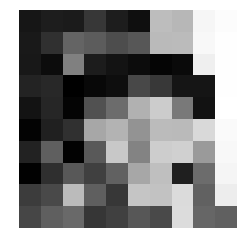

In [162]:
plt.imshow(image_10x10,cmap='gray'),plt.axis('off')
plt.show

In [163]:
image_10x10.shape

(10, 10)

In [166]:
# 带颜色的话
image_color = cv2.imread("/Users/jiajia/Desktop/handing_img/12.png",cv2.IMREAD_COLOR)
image_10x10 = cv2.resize(image_color,(10,10)) 


<function matplotlib.pyplot.show>

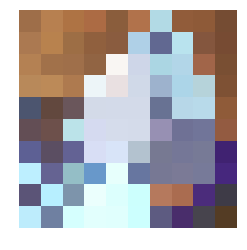

In [167]:
plt.imshow(image_10x10,cmap='gray'),plt.axis('off')
plt.show

In [168]:
image_10x10.shape # 带颜色就要翻三倍 因为三个色道表示一个像素点

(10, 10, 3)

# 8.14 把色值平均值编码成 feature  

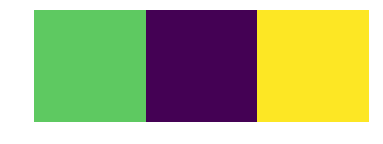

In [171]:

import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

image_bgr = cv2.imread("/Users/jiajia/Desktop/handing_img/12.png",cv2.IMREAD_COLOR)
channels = cv2.mean(image_bgr)

observation  = np.array([(channels[2],channels[1],channels[0])])
observation

plt.imshow(observation),plt.axis("off")
plt.show()

# 8.15 颜色直方图feature  ( 颜色出现次数

In [173]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

image_bgr = cv2.imread("/Users/jiajia/Desktop/handing_img/12.png",cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)

features = []

colors = ('r','g','b')

for i , channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb],
                            [i],
                            None,
                            [256],
                             [0,256])
    features.extend(histogram)
    
observation = np.array(features).flatten()
observation[0:5]

array([0., 0., 0., 0., 0.], dtype=float32)

In [174]:
image_rgb[0,0]

array([ 73, 112, 157], dtype=uint8)

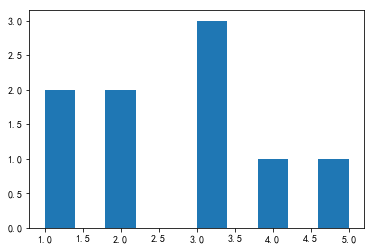

In [175]:
import pandas as pd # 给了一个例子说明了颜色频次统计

data  = pd.Series([1,1,2,2,3,3,3,4,5])

data.hist(grid=False)

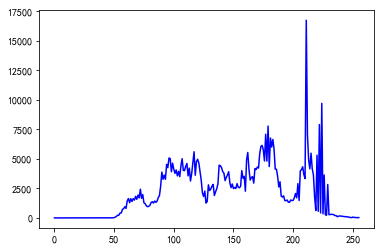

In [179]:
plt.plot(histogram,color=channel)
# plt.xlim([0,256])
plt.show()